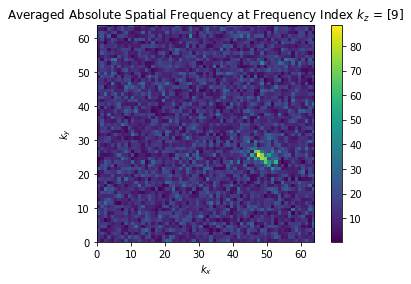

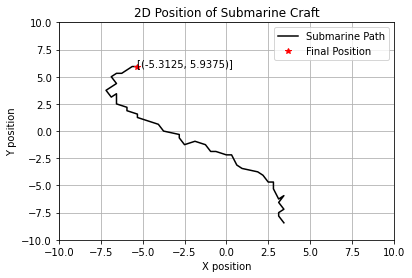

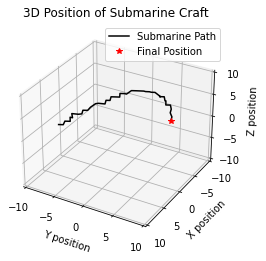

In [4]:
import numpy as np
import IPython as ipy
import plotly.graph_objs as go
import matplotlib.pyplot as plt

d = np.load('subdata.npy')

L = 10; # length of spatial domain (cube of side L = 2*10)
N_grid = 64; # number of grid points/Fourier modes in each direction
xx = np.linspace(-L, L, N_grid+1) #spatial grid in x dir
x = xx[0:N_grid]
y = x # same grid in y,z direction
z = x
K_grid = (2*np.pi/(2*L))*np.linspace(-N_grid/2, N_grid/2 -1, N_grid) # frequency grid for one coordinate
xv, yv, zv = np.meshgrid( x, y, z) # generate 3D meshgrid for plotting
kxv, kyv = np.meshgrid (K_grid, K_grid)

# Computing the Average
sumfft = np.zeros((N_grid, N_grid, N_grid))
for i in range(49):
    signal = np.reshape(d[:, i], (N_grid, N_grid, N_grid))
    sumfft = sumfft + np.fft.fftshift(np.fft.fftn(signal))  


# Computing Average fft and dominant spatial frequency (kmax)
avefft = sumfft/49
fftmax = np.amax(avefft)
fftmaxarg1 = np.where(avefft==fftmax)
kxmax1 = K_grid[fftmaxarg1[1]]
kymax1 = K_grid[fftmaxarg1[0]]
kzmax1 = K_grid[fftmaxarg1[2]]
kxmax2 = K_grid[N_grid - fftmaxarg1[1]]
kymax2 = K_grid[N_grid - fftmaxarg1[0]]
kzmax2 = K_grid[N_grid - fftmaxarg1[2]]

# Simple Gaussian Filter
filter1 = np.zeros((N_grid,N_grid,N_grid))
filter2 = np.zeros((N_grid,N_grid,N_grid))
sigma = 4 # kils outside of index -8 < kmax < 8
for ii in range(N_grid):
        for jj in range(N_grid):
            for kk in range(N_grid):
                filter1[ii,jj,kk]=np.exp(-1*((K_grid[ii]-kxmax1)**2 + (K_grid[jj]-kymax1)**2 + (K_grid[kk]-kzmax1)**2)/(2*sigma**2))
                filter2[ii,jj,kk]=np.exp(-1*((K_grid[ii]-kxmax2)**2 + (K_grid[jj]-kymax2)**2 + (K_grid[kk]-kzmax2)**2)/(2*sigma**2))      
filter = filter1 + filter2

# Visual Inspection for $K_max$
fig, ax1 = plt.subplots()
pos = ax1.imshow(abs(avefft[:,:,fftmaxarg1[2]]), extent = ([0,64,0,64]))
ax1.set_xlabel('$k_x$')
ax1.set_ylabel('$k_y$')
ax1.set_title('Averaged Absolute Spatial Frequency at Frequency Index $k_z$ = {}'.format(fftmaxarg1[2]))
fig.colorbar(pos, ax = ax1)
plt.show()                

subpos = np.zeros((49,3))
filter_signal = np.zeros((N_grid, N_grid, N_grid))
for ll in range(49):
    filter_signal[:,:,:] = np.reshape(d[:, ll], (N_grid, N_grid, N_grid))
    inter = np.real(np.fft.ifftn(np.fft.ifftshift(filter*np.fft.fftshift(np.fft.fftn(filter_signal)))))
    filter_pos_max = np.amax(inter)
    filter_arg = np.where(filter_pos_max == inter)
    subpos[ll,0] = xv[filter_arg]
    subpos[ll,1] = yv[filter_arg]
    subpos[ll,2] = zv[filter_arg]

fig, ax = plt.subplots() 
ax.grid()
ax.plot(subpos[:,0],subpos[:,1], 'k', label = 'Submarine Path')
ax.plot(subpos[-1,0],subpos[-1,1],'r*', label = 'Final Position')
ax.annotate('{}'.format([(subpos[-1,0], subpos[-1,1])]), (subpos[-1,0], subpos[-1,1]))
ax.set_xlim([-L, L])
ax.set_ylim([-L, L])
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_title('2D Position of Submarine Craft')
ax.legend()
plt.show()

ax = plt.axes(projection='3d')
ax.grid()
ax.plot3D(subpos[:,1],subpos[:,0],subpos[:,2],'k',label = 'Submarine Path')
ax.plot3D(subpos[-1,1],subpos[-1,0],subpos[-1,2],'r*', label = 'Final Position')
ax.set_xlim([-L, L])
ax.set_ylim([L, -L])
ax.set_zlim([-L, L])
ax.set_xlabel('Y position')
ax.set_ylabel('X position')
ax.set_zlabel('Z position')
ax.set_title('3D Position of Submarine Craft')
ax.legend()
plt.show()